<a href="https://colab.research.google.com/github/aanacaa/stock-analysis/blob/master/Analise_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.layers import SimpleRNN
from keras.models import Sequential
from numpy.random import seed


In [ ]:
seed(42)
plt.rcParams['figure.figsize'] = 16,4

In [ ]:
SPLIT_DATE = '2015/01/01'
WINDOW_SIZE = 30

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analise/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date')
df = df.dropna() #limpar o nan

In [ ]:
df.head()#se deixar sem indice ele cria 1,2,3... no head colocar o numero de linhas que deseja ver

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
df['Average'] = (df['High'] + df['Low']) /2

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Name,Average
Date,,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM,81.680
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM,81.915
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM,81.950
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM,84.220
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM,83.815


In [ ]:
df = df[['Average']] # com 2 [] é dataframedf = df['Average'] = series

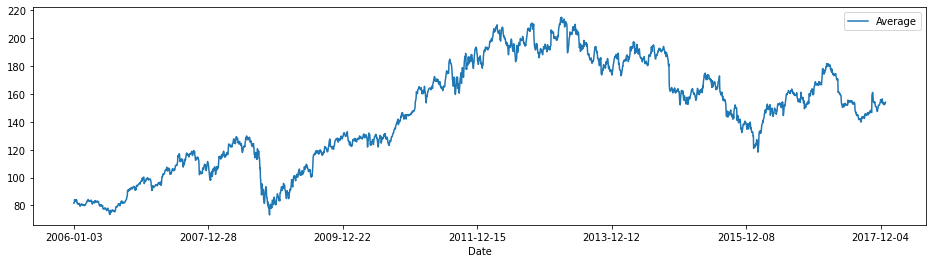

In [ ]:
df.plot(legend=True)

In [ ]:
df_train = df[df.index < SPLIT_DATE].copy()
df_test = df[df.index >= SPLIT_DATE].copy()

In [ ]:
scaler = MinMaxScaler()
df_train['Average'] = scaler.fit_transform(df_train['Average'].values.reshape(-1,1))

In [ ]:
#df_train['Average'].values.reshape(-1,1) #shapes

In [ ]:
df_test['Average'] = scaler.transform(df_test['Average'].values.reshape(-1,1))

In [ ]:
df_test.min().values, df_test.max().values

(array([0.31758567]), array([0.7656889]))

In [ ]:
print(df_train.min().values, df_train.max().values)

[0.] [1.]


In [ ]:
def gen_rnn_inputs(df, window_size):
    X, y = [], []
    
    averages = df['Average'].values
    
    for i in range(window_size, len(df)):
        
        X.append(averages[i-window_size:i])
        y.append(averages[i])
        
    return np.array(X), np.array(y)

In [ ]:
len(df_test)

502

In [ ]:
X_train, y_train = gen_rnn_inputs(df_test, WINDOW_SIZE)
X_test, y_test = gen_rnn_inputs(df_test, WINDOW_SIZE)

In [ ]:
model = Sequential ()
model.add(SimpleRNN(1, input_shape = (WINDOW_SIZE,1)))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train

array([0.36433507, 0.41344662, 0.41605556, 0.42391764, 0.41933437,
       0.41140178, 0.4192286 , 0.42444648, 0.41524468, 0.42374136,
       0.43780849, 0.44968975, 0.45818643, 0.46150049, 0.46287548,
       0.47567339, 0.46918629, 0.48283035, 0.48565082, 0.48790721,
       0.49538147, 0.51223382, 0.51664081, 0.5251375 , 0.53109576,
       0.5171344 , 0.51554788, 0.52672402, 0.53158934, 0.53677196,
       0.54992244, 0.55256663, 0.56039346, 0.54565647, 0.53405726,
       0.53278804, 0.5345861 , 0.54537442, 0.53663094, 0.54428148,
       0.55231984, 0.55203779, 0.55757298, 0.50444225, 0.51022423,
       0.52919193, 0.53596108, 0.52718234, 0.53310534, 0.54036807,
       0.53032012, 0.51138767, 0.51103511, 0.4982372 , 0.50003526,
       0.5156889 , 0.51459597, 0.52436187, 0.53342265, 0.54065012,
       0.52890989, 0.53165985, 0.53218869, 0.52993231, 0.52319842,
       0.50913129, 0.51678184, 0.52224651, 0.52584262, 0.54332957,
       0.55380059, 0.5591595 , 0.56268509, 0.55820759, 0.56106

In [ ]:
model.fit(np.expand_dims(X_train,axis = -1), y_train, epochs = 50, batch_size=8, verbose=2)

Epoch 1/50
59/59 - 0s - loss: 0.0627
Epoch 2/50
59/59 - 0s - loss: 0.0274
Epoch 3/50
59/59 - 0s - loss: 0.0036
Epoch 4/50
59/59 - 0s - loss: 6.4804e-04
Epoch 5/50
59/59 - 0s - loss: 6.2957e-04
Epoch 6/50
59/59 - 0s - loss: 6.2678e-04
Epoch 7/50
59/59 - 0s - loss: 6.2280e-04
Epoch 8/50
59/59 - 0s - loss: 6.2230e-04
Epoch 9/50
59/59 - 0s - loss: 6.1433e-04
Epoch 10/50
59/59 - 0s - loss: 6.0965e-04
Epoch 11/50
59/59 - 0s - loss: 6.0470e-04
Epoch 12/50
59/59 - 0s - loss: 6.0233e-04
Epoch 13/50
59/59 - 0s - loss: 6.0528e-04
Epoch 14/50
59/59 - 0s - loss: 5.9486e-04
Epoch 15/50
59/59 - 0s - loss: 5.9293e-04
Epoch 16/50
59/59 - 0s - loss: 5.9893e-04
Epoch 17/50
59/59 - 0s - loss: 6.0205e-04
Epoch 18/50
59/59 - 0s - loss: 5.8677e-04
Epoch 19/50
59/59 - 0s - loss: 5.8776e-04
Epoch 20/50
59/59 - 0s - loss: 5.8377e-04
Epoch 21/50
59/59 - 0s - loss: 5.8462e-04
Epoch 22/50
59/59 - 0s - loss: 5.7443e-04
Epoch 23/50
59/59 - 0s - loss: 5.8023e-04
Epoch 24/50
59/59 - 0s - loss: 5.7815e-04
Epoch 25/50
5

In [ ]:
y_pred = model.predict(np.expand_dims(X_test, axis = -1))

In [ ]:
np.zeros(WINDOW_SIZE).tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
df_test_preds = df_test.copy()
df_test_preds ['Average'] = np.zeros(WINDOW_SIZE).tolist() +\
    scaler.inverse_transform(y_test.reshape(-1, 1)).squeeze().tolist()

df_test_preds ['Pred'] = np.zeros(WINDOW_SIZE).tolist() +\
    scaler.inverse_transform(y_pred.reshape(-1, 1)).squeeze().tolist()


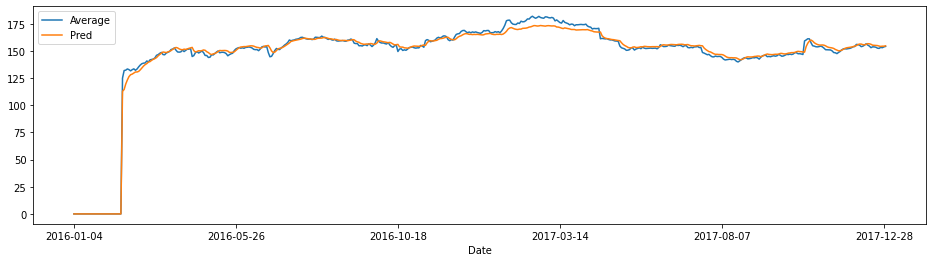

In [ ]:
df_test_preds.plot(legend=True)